This will extract year, citation, and abstract for the research data 
Input: .txt file of research
Output: {ID: (year, citation, abstract)}

In [ ]:
#id  string: S2 generated research paper ID
#title  string: Research paper title.
#paperAbstract  string: Extracted abstract of the paper
#entities  list: S2 extracted list of relevant entities or topics.
#s2Url  string: URL to S2 research paper details page
#s2PdfUrl  string: URL to PDF on S2 if available.
#pdfUrls  list: URLs related to this PDF scraped from the web.
#authors  list: List of authors with an S2 generated author ID and name.
#inCitations  list: List of S2 paperId's which cited this paper.
#outCitations  list: List of paperId's which this paper cited.
#year  int: Year this paper was published as integer.
#venue  string: Extracted venue published.
#journalName  string: Name of the journal that published this paper.
#journalVolume  string: The volume of the journal where this paper was published.
#journalPages  string: The pages of the journal where this paper was published.
#sources  list: Identifies papers sourced from DBLP or Medline.
#doi  string: Digital Object Identifier registered at doi.org.
#doiUrl  string: DOI link for registered objects.
#pmid  string: Unique identifier used by PubMed.

In [3]:
import os
import re

cwd = os.getcwd() # get the current working directory 
with open(cwd + '/sample-S2-records.txt') as myfile:
    data = myfile.read().splitlines() # a list with each line as an entry

In [17]:
first_entry = data[0] # first entry
print(data[0])

{"entities":["Epithelial ovarian cancer","Excision","Extraction","Hospital admission","Malignant neoplasm of ovary","Morbidity - disease rate","Neoadjuvant Therapy","Neoplasms","Overall Survival","Patients","Postoperative Complications","Residual Tumor","SLC13A5 gene","Stage IV Ovarian Carcinoma","Tumor Debulking","intensive care unit","ovarian neoplasm","stage IV childhood Hodgkin's lymphoma"],"journalVolume":"19","journalPages":"959-965","pmid":"21994038v1","year":2011,"outCitations":["166ac4b6f694c68dafdc912ca0c336b4c444fd9e","f0223f8d1920009d1afccffe2d4129f2211711cf","aaee9e127e63a4ee8baae2bc8a960f4a42afce78","03029e4427cfe66c3da6257979dc2d5b6eb3a0e4","d14434966fd87e94c97ed88938ea3dd5282d7652","d6fa05d67f9a6fc3256d05c81a4c55c472e78b0c","e9b9d08937fd2e603d5f8106ccaf81589dfa9cdf","943c32265fa79b20b925f6cc450db19b21c47bc0","07407593b49bc95f8d0c3c3ab912d78564db3302","fedaf6c7ea8b58e501b667603b8a23f1756ce375","ce84de64d8388258243244bbb4aef290e6022d30","399e7acd3fb9fa3f7bcf75e378e6176f7f

In [19]:
print("Length of data:", len(data))

Length of data: 102


In [161]:
# looking for inCitations, year, and paperAbstract
# The label is the descriptor. Ex. "year", "id", "abstract"
# The tag is the unique identifier. Ex "2011", "4cbba8127c8747a3b2cfb9c1f48c43e5c15e323e"
parenthesis = "\"" # string literal for "

paper_mappings = {}

# finding the id tag 
paper_id_tag = "\"id\"" # find the first occurence of "id"
id_label_start = first_entry.find(paper_id_tag) # this is the index that the id label starts
id_label_end = id_tag_start + 4 # this is the index that the id label ends 
id_tag_start = id_label_start + 6 # this is the index that the id tag starts. Always be 6. 
id_tag_end = first_entry.find(parenthesis, id_tag_start) - 1 #this is the index that the id tag ends
id_tag = first_entry[id_tag_start:id_tag_end] # id tag string 

# find year 
paper_year_tag = "\"year\"" # find the first occurence of "year"
year_label_start = first_entry.find(paper_year_tag) # index that the year label starts 
year_label_end = year_label_start + 7 # index that the year label ends 
year_tag_start = year_label_start + 7 # index that the year tag starts 
year_tag_end = first_entry.find(parenthesis, year_tag_start) - 1 # this is the index that the year tag ends
year_tag = first_entry[year_tag_start:year_tag_end] # year tag string

# find number of citations 
# check edge cases where "inCitations":[], "inCitations":[aienf23f9j023], "inCitations":[anea39rjna3rj, a3r98a3hrn9a38hr]
# we'll count by commas, but work the edge cases
bracket = r"]" # look for "]"
paper_citation_tag = "\"inCitations\"" # find the occurence of "inCitations"
citation_label_start = first_entry.find(paper_citation_tag) # index that the citation label starts 
citation_label_end = citation_label_start + 15 # index that the citation label ends
citation_tag_start = citation_label_start + 15 # index that the citation tag starts
citation_tag_end = first_entry.find(bracket, citation_tag_start)  # this is the index that the citation tag ends 
citation_list = first_entry[citation_tag_start:citation_tag_end].split(",")
num_citations = len(citation_list)

# find abstract 
paper_abstract_tag = "\"paperAbstract\""
abstract_label_start = first_entry.find(paper_abstract_tag)
abstract_label_end = abstract_label_start + 17
abstract_tag_start = abstract_label_start + 17 # the start of the abstract tag 
abstract_tag_end = first_entry.find(parenthesis, abstract_tag_start) # the end of the abstract tag
abstract_tag = first_entry[abstract_tag_start:abstract_tag_end]

# mapping = {id:(year, number of citations, abstract)}
paper_mappings[id_tag] = (year_tag, num_citations, abstract_tag)

In [162]:
print(paper_mappings)

{'4cbba8127c8747a3b2cfb9c1f48c43e5c15e323': ('2011', 27, 'Primary debulking surgery (PDS) has historically been the standard treatment for advanced ovarian cancer. Recent data appear to support a paradigm shift toward neoadjuvant chemotherapy with interval debulking surgery (NACT-IDS). We hypothesized that stage IV ovarian cancer patients would likely benefit from NACT-IDS by achieving similar outcomes with less morbidity. Patients with stage IV epithelial ovarian cancer who underwent primary treatment between January 1, 1995 and December 31, 2007, were identified. Data were retrospectively extracted. Each patient record was evaluated to subclassify stage IV disease according to the sites of tumor dissemination at the time of diagnosis. The Kaplan–Meier method was used to compare overall survival (OS) data. A total of 242 newly diagnosed stage IV epithelial ovarian cancer patients were included in the final analysis; 176 women (73%) underwent PDS, 45 (18%) NACT-IDS, and 21 (9%) chemoth

In [31]:
# mapping ids to (year, number of citations, and abstract tag)
# TO DO 
# some research papers don't have years! Write an exception for this 
# some research papers may have no citations! Write exceptiosn for this 
# some research papers just don't have any abstracts lol. Fix this. 

paper_mappings = {} # set up the dictionary to store information 

# setting up important variables 
parenthesis = "\"" # string literal for "
bracket = r"]" # look for "]"
paper_id_tag = "\"id\"" # find the first occurence of "id"
paper_year_tag = "\"year\"" # find the first occurence of "year"
paper_citation_tag = "\"inCitations\"" # find the occurence of "inCitations"
paper_abstract_tag = "\"paperAbstract\""

# loop through each line of the data 
for line in data: 
    # look for the labels "id", "year", "inCitations", and "paperAbstract"
    id_label_start = line.find(paper_id_tag) # this is the index that the id label starts
    year_label_start = line.find(paper_year_tag) # index that the year label starts 
    citation_label_start = line.find(paper_citation_tag) # index that the citation label starts 
    abstract_label_start = line.find(paper_abstract_tag) # index that the abstrat label starts 
    
    # look for the tag of each label 
    id_tag_start = id_label_start + 6 # this is the index that the id tag starts. Always be 6. 
    year_tag_start = year_label_start + 7 # index that the year tag starts 
    citation_tag_start = citation_label_start + 15 # index that the citation tag starts
    abstract_tag_start = abstract_label_start + 17 # the start of the abstract tag 
    
    # look for the last index of each tag 
    id_tag_end = line.find(parenthesis, id_tag_start) - 1 #this is the index that the id tag ends
    year_tag_end = line.find(parenthesis, year_tag_start) - 1 # this is the index that the year tag ends
    citation_tag_end = line.find(bracket, citation_tag_start)  # this is the index that the citation tag ends 
    abstract_tag_end = line.find(parenthesis, abstract_tag_start) # the end of the abstract tag
    
    # extract the tag
    id_tag = line[id_tag_start:id_tag_end] # id tag string 
    if year_label_start == -1: # it didn't find the string year 
        year_tag = None
    else: 
        year_tag = line[year_tag_start:year_tag_end] # year tag string
    if citation_tag_start == citation_tag_end: # if there are no citations: 
        num_citations = 0
    else:
        citation_list = line[citation_tag_start:citation_tag_end].split(",") # make it a list, count number of entries
        num_citations = len(citation_list) # number of citations 
    abstract_tag = line[abstract_tag_start:abstract_tag_end] # abstract tag string 
    
    if id_tag not in paper_mappings: 
        paper_mappings[id_tag] = (year_tag, num_citations, abstract_tag)

In [189]:
print("Useful information for last entry")
print()
print("ID label index start:",id_label_start)
print("Year label index start:",year_label_start)
print("Citation label index start:",citation_label_start)
print("Abstract label index start:",abstract_label_start)
print()
print("ID tag index start:", id_tag_start)
print("Year tag index start:", year_tag_start)
print("Citation tag index start:", citation_tag_start)
print("Abstract tag index start:", abstract_tag_start)
print()
print("ID tag index end:", id_tag_end)
print("Year tag index end:", year_tag_end)
print("Citation tag index end:", citation_tag_end)
print("Abstract tag index end:", abstract_tag_end)
print()
print("ID tag:", id_tag)
print("Year tag:", year_tag)
print("Citation tag:", num_citations)
print("Abstract tag:", abstract_tag)
print()
print("Number of mappings in paper_mappings", len(paper_mappings))


Useful information for last entry

ID label index start: 1743
Year label index start: 248
Citation label index start: 2295
Abstract label index start: 1861

ID tag index start: 1749
Year tag index start: 255
Citation tag index start: 2310
Abstract tag index start: 1878

ID tag index end: 1788
Year tag index end: 259
Citation tag index end: 2825
Abstract tag index end: 2293

ID tag: 043f91aa4e90077b17231adc6e6e98ceb8e88f6
Year tag: 2007
Citation tag: 12
Abstract tag: We introduce a Sumii-Pierce-Koutavas-Wand-style bisimulation for Pitts and Stark’s nucalculus, a simply-typed lambda calculus with fresh name generation. This bisimulation coincides with contextual equivalence and provides a usable and elementary method for establishing all the subtle equivalences given by Stark [29]. We also describe the formalization of soundness and of the examples in the Coq proof assistant.

Number of mappings in paper_mappings 102


In [192]:
print(paper_mappings.keys())

dict_keys(['4cbba8127c8747a3b2cfb9c1f48c43e5c15e323', '4c61478345166be0d917854bd5e5f42a6ade236', '34ca6d85db744543ddc27d74d7f225b13c66b95', '3316b8b97c1e17ac93f220f4b64842905c40cd9', '58ff17c7d8ca006731facf7771761946350db06', 'f487c60cc4b4637584f89d4bc892aae4eb8c8a1', '69662bd2a2f5ff9cf2b0230bcc852290eadfbfc', '3f1b5aa320422a4df10ed248898125e6fd3440d', '453ae606c4c5f2dd278b8892b1eed9ecd5154ec', 'c739d07173f366ba99a948c7888459c5d70adcf', 'cb61fc1ebdeb5835460c18044d331388d5b1067', '50ef31b58a30dfefb624db6f72cda7bc242cde5', '10b5e8d1ab6f8002c89b2bfe4002a22c4f6ea9d', 'ccc67f73db54afc3f016ba5449d30235b7c256b', '7e1dc0e805fbb13112da580c37c50d117944afe', '7331b32342d54e97ca7e32f01b9e1ae94ed563d', '177e662ac662c21b02f28d8bf6c35ef98487411', 'ac1ccf2f8d373a4964b127ba651a21b75e184be', '06f3d20b2c9191b4f03761a61312a1c71345a00', 'b048c1886c86e65fdfa489038372f938cf62a59', 'a19381d3b56fbe1b7e5426c92ee1e140cd752e5', '213a87540ca26cc97a356689654dd4338cb327a', 'dabb12f12f5ea266754c7b966af3f588a885ff2', 

In [39]:
# testing years 
#keys = list(paper_mappings.keys())
i = 0
'''
for key in keys: 
    if paper_mappings[key][0] == "tie":
        print(key)
    i += 1
    #print(i)
    print(paper_mappings[key][0])
'''


'\nfor key in keys: \n    if paper_mappings[key][0] == "tie":\n        print(key)\n    i += 1\n    #print(i)\n    print(paper_mappings[key][0])\n'

In [37]:
# testing citations
keys = list(paper_mappings.keys())
#for key in keys: 
    #print(paper_mappings[key][1])

0.2549019607843137



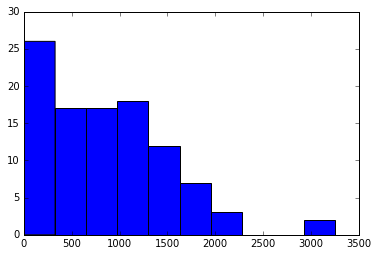

In [49]:
# testing length of abstracts 
from matplotlib import pyplot
%matplotlib inline
keys = list(paper_mappings.keys())
values = []
for key in keys: 
    values.append(len(paper_mappings[key][2]))
    #print(len(paper_mappings[key][2]))

x = pyplot.hist(values)
print(x[0][0]/sum(x[0]))
print()
    

In [42]:
# testing keys
keys = list(paper_mappings.keys())
i = 0 
for key in keys: 
    i += 1
    print("this is key:", i)
    print(key)

this is key: 1
4cbba8127c8747a3b2cfb9c1f48c43e5c15e323
this is key: 2
4c61478345166be0d917854bd5e5f42a6ade236
this is key: 3
34ca6d85db744543ddc27d74d7f225b13c66b95
this is key: 4
3316b8b97c1e17ac93f220f4b64842905c40cd9
this is key: 5
58ff17c7d8ca006731facf7771761946350db06
this is key: 6
f487c60cc4b4637584f89d4bc892aae4eb8c8a1
this is key: 7
69662bd2a2f5ff9cf2b0230bcc852290eadfbfc
this is key: 8
3f1b5aa320422a4df10ed248898125e6fd3440d
this is key: 9
453ae606c4c5f2dd278b8892b1eed9ecd5154ec
this is key: 10
c739d07173f366ba99a948c7888459c5d70adcf
this is key: 11
cb61fc1ebdeb5835460c18044d331388d5b1067
this is key: 12
50ef31b58a30dfefb624db6f72cda7bc242cde5
this is key: 13
10b5e8d1ab6f8002c89b2bfe4002a22c4f6ea9d
this is key: 14
ccc67f73db54afc3f016ba5449d30235b7c256b
this is key: 15
7e1dc0e805fbb13112da580c37c50d117944afe
this is key: 16
7331b32342d54e97ca7e32f01b9e1ae94ed563d
this is key: 17
177e662ac662c21b02f28d8bf6c35ef98487411
this is key: 18
ac1ccf2f8d373a4964b127ba651a21b75e184be
t

In [44]:
print(paper_mappings["de0d959928f27cc5f2c544aaddd1129a2265558"])

('2016', 0, '................................................................................................................................. 4 ZUSAMMENFASSUNG ................................................................................................................ 5 INTRODUCTION .......................................................................................................................... 7 METHODS .................................................................................................................................. 11 Study animals and housing .................................................................................................... 11 Experiment 1 .......................................................................................................................... 13 Experimental Set-Up ......................................................................................................... 13 Procedure ....................................

In [15]:
test_string = "hellomynameisnewton"
try:
    x = test_string.find("yellow")

SyntaxError: unexpected EOF while parsing (<ipython-input-15-b7a4bb077c45>, line 3)

In [29]:
test_string = "\"inCitations\":[],"
citation_label_start = test_string.find(paper_citation_tag) # index that the citation label starts
citation_tag_start = citation_label_start + 15 # index that the citation tag starts
citation_tag_end = test_string.find(bracket, citation_tag_start)  # this is the index that the citation tag ends
citation_list = test_string[citation_tag_start:citation_tag_end].split(",") # make it a list, count number of entries
num_citations = len(citation_list) # number of citations 

In [30]:
print(citation_label_start)
print(citation_tag_start)
print(citation_tag_end)
print(citation_list)
print(num_citations)

0
15
15
['']
1


In [34]:
test_string = "\"paperAbstract\":\"\""